# Tugas Besar - IF2220 - Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

### Soal Tugas

Diberikan sebuah data water_potability.csv yang dapat diakses pada utas berikut: Dataset
Tugas Besar IF2220. water_potability.csv merupakan data metrik kualitas air yang
mengandung 11 kolom sebagai berikut:
1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut: (Untuk nomor 4 dan 5, dipastikan data yang diberikan sudah merupakan sampel)

In [1]:
# Markdown dan display untuk menulis di notebook
from IPython.display import Markdown, display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Import data
nama_kolom = ['id','pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','OrganicCarbon','Trihalomethanes','Turbidity','Potability']
water_potability = pd.read_csv("water_potability.csv", names = nama_kolom)
water_potability.head()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak 

*Normality test* dilakukan untuk seluruh kolom, kecuali id dan Potability. *Normality test* dilakukan dengan meninjau histogram plot yang sudah ditampilkan di atas. 
- pH berdistribusi **normal**
- Hardness berdistribusi **normal**
- Solids **tidak** berdistribusi **normal**
- Chloramines berdistribusi **normal**
- Sulfate **tidak** berdistribusi **normal**
- Conductivity **tidak** berdistribusi **normal**
- OrganicCarbon berdistribusi **normal**
- Trihalomethanes berdistribusi **normal**
- Turbidity berdistribusi **normal**

Normality test juga dilakukan dengan menggunakan library `scipy.stats.normaltest()` untuk masing-masing kolom, dengan alpha = 0.05. Hasilnya ditampilkan di bawah.

In [3]:
for i in nama_kolom:
    if(i != "id" and i != "Potability"):
        k2, pvalue = st.normaltest(water_potability[i])
        # bandingkan pvalue dengan alpha = 0.05
        if (pvalue < 0.05):
            print("Kolom '" + i + "' tidak terdistribusi normal")
        else:
            print("Kolom '" + i + "' terdistribusi normal")

Kolom 'pH' tidak terdistribusi normal
Kolom 'Hardness' tidak terdistribusi normal
Kolom 'Solids' tidak terdistribusi normal
Kolom 'Chloramines' tidak terdistribusi normal
Kolom 'Sulfate' tidak terdistribusi normal
Kolom 'Conductivity' tidak terdistribusi normal
Kolom 'OrganicCarbon' terdistribusi normal
Kolom 'Trihalomethanes' terdistribusi normal
Kolom 'Turbidity' terdistribusi normal


### 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing 
Boxplot juga ditampilkan untuk kolom/bagian yang bersesuaian.

In [4]:
# definisi fungsi z_score 2 sample
def z_score2(x1, x2, d0, var1, var2, n1, n2):
    return ((x1 - x2) - d0) / (((var1 / n1) + (var2 / n2))**0.5)

#### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

In [5]:
n1 = water_potability['Sulfate'].count() // 2
n2 = water_potability['Sulfate'].count() - n1

sulfate_awal = water_potability.iloc[:n1,:]
sulfate_akhir = water_potability.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 \\neq 0$"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan P-value"))
xbar1, xbar2 = sulfate_awal['Sulfate'].mean(), sulfate_akhir['Sulfate'].mean()
var1, var2 = sulfate_awal['Sulfate'].var(), sulfate_akhir['Sulfate'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0$"))

z = z_score2(xbar1, xbar2, 0, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(|Z| > "+str(abs(z))+") = 2P(Z < "+str(z)+") \\approx "+str(0.0188*2)+" < 0.05$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ DITOLAK** karena P-value yang didapat lebih kecil dari $\\alpha$ ($z$ hasil perhitungan terletak di salah satu daerah kritis, yaitu $z < -1.96$\n"))

Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \mu_1 - \mu_2 = 0$

#### 2. Hipotesis alternatif

$
H_1 : \mu_1 - \mu_2 \neq 0$

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$

#### 5. Perhitungan nilai uji statistik dan P-value

$\bar{X}_1 = 331.30532950549565$

$\bar{X}_2 = 335.11742332488245$

$S^2_1 = 1708.3966020772502$

$S^2_2 = 1682.7330644425087$

$n_1 = 1005,n_2 = 1005$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$

didapat $z = -2.0752690696871983$ sehingga $P = P(|Z| > 2.0752690696871983) = 2P(Z < -2.0752690696871983) \approx 0.0376 < 0.05$

#### 6. Kesimpulan

**$H_0$ DITOLAK** karena P-value yang didapat lebih kecil dari $\alpha$ ($z$ hasil perhitungan terletak di salah satu daerah kritis, yaitu $z < -1.96$


Boxplot kolom 'Sulfate' bagian awal


<AxesSubplot:>

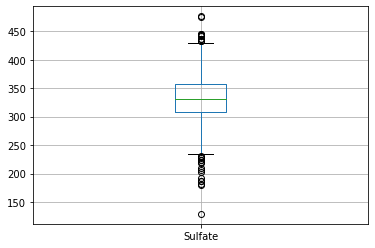

In [6]:
print("Boxplot kolom 'Sulfate' bagian awal")
sulfate_awal.boxplot(["Sulfate"])

Boxplot kolom 'Sulfate' bagian akhir


<AxesSubplot:>

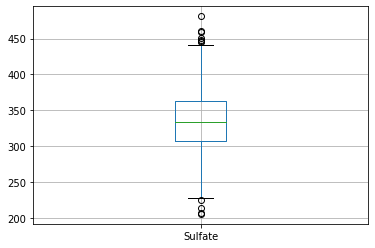

In [7]:
print("Boxplot kolom 'Sulfate' bagian akhir")
sulfate_akhir.boxplot(["Sulfate"])

#### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.15?

In [8]:
n1 = water_potability['OrganicCarbon'].count() // 2
n2 = water_potability['OrganicCarbon'].count() - n1

oc_awal = water_potability.iloc[:n1,:]
oc_akhir = water_potability.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0.15$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 > 0.15$"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *one-tailed test*. Daerah kritis: $z > 1.6449$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
xbar1, xbar2 = oc_awal['OrganicCarbon'].mean(), oc_akhir['OrganicCarbon'].mean()
var1, var2 = oc_awal['OrganicCarbon'].var(), oc_akhir['OrganicCarbon'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0.15$"))

z = z_score2(xbar1, xbar2, 0.15, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(Z > "+str(z)+") = 0.9920 > 0.05$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$\n"))

Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \mu_1 - \mu_2 = 0.15$

#### 2. Hipotesis alternatif

$
H_1 : \mu_1 - \mu_2 > 0.15$

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **Z-Test** dengan tipe *one-tailed test*. Daerah kritis: $z > 1.6449$

#### 5. Perhitungan nilai uji statistik dan p-value

$\bar{X}_1 = 14.253972723723393$

$\bar{X}_2 = 14.461907080372756$

$S^2_1 = 11.230287224380323$

$S^2_2 = 10.880581782847479$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0.15$

didapat $z = -2.413145517798807$ sehingga $P = P(Z > -2.413145517798807) = 0.9920 > 0.05$

#### 6. Kesimpulan

**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$


Boxplot kolom 'OrganicCarbon' bagian awal


<AxesSubplot:>

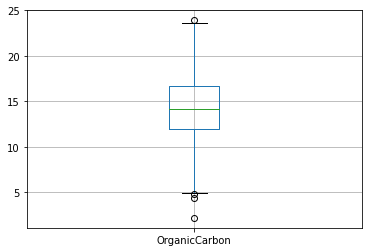

In [9]:
print("Boxplot kolom 'OrganicCarbon' bagian awal")
oc_awal.boxplot(["OrganicCarbon"])

Boxplot kolom 'OrganicCarbon' bagian akhir


<AxesSubplot:>

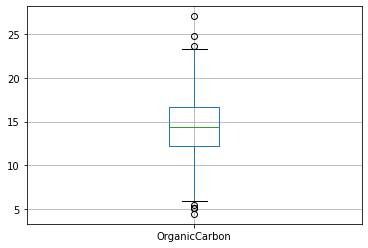

In [10]:
print("Boxplot kolom 'OrganicCarbon' bagian akhir")
oc_akhir.boxplot(["OrganicCarbon"])

#### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

In [11]:
chloramines_awal = water_potability.iloc[:100,:]
chloramines_akhir = water_potability.iloc[-100:,:]

n1 = 100
n2 = 100

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 \\neq 0$"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
xbar1, xbar2 = chloramines_awal['Chloramines'].mean(), chloramines_akhir['Chloramines'].mean()
var1, var2 = chloramines_akhir['Chloramines'].var(), chloramines_akhir['Chloramines'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0$"))

z = z_score2(xbar1, xbar2, 0, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(|Z| > "+str(abs(z))+") = 2P(Z < "+str(z)+") \\approx "+str(0.2266*2)+" > 0.05$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena nilai $t'$ yang didapat **TIDAK terletak** di daerah kritis, yaitu $t' < -1.972017$\n"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z < -1.96$ atau $z > 1.96$\n"))

Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \mu_1 - \mu_2 = 0$

#### 2. Hipotesis alternatif

$
H_1 : \mu_1 - \mu_2 \neq 0$

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$

#### 5. Perhitungan nilai uji statistik dan p-value

$\bar{X}_1 = 7.007771140423921$

$\bar{X}_2 = 7.147197636249925$

$S^2_1 = 1.7077427735538262$

$S^2_2 = 1.7077427735538262$

$n_1 = 100,n_2 = 100$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$

didapat $z = -0.7544302374237427$ sehingga $P = P(|Z| > 0.7544302374237427) = 2P(Z < -0.7544302374237427) \approx 0.4532 > 0.05$

#### 6. Kesimpulan

**$H_0$ TIDAK DITOLAK** karena nilai $t'$ yang didapat **TIDAK terletak** di daerah kritis, yaitu $t' < -1.972017$


**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z < -1.96$ atau $z > 1.96$


Boxplot kolom 'Chloramines' bagian awal


<AxesSubplot:>

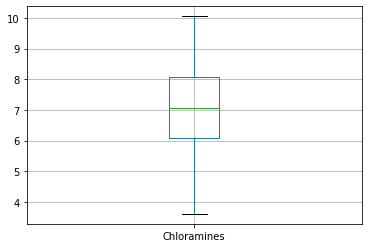

In [12]:
print("Boxplot kolom 'Chloramines' bagian awal")
chloramines_awal.boxplot(["Chloramines"])

Boxplot kolom 'Chloramines' bagian akhir


<AxesSubplot:>

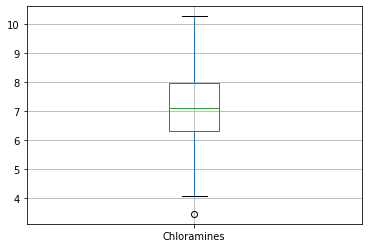

In [13]:
print("Boxplot kolom 'Chloramines' bagian akhir")
chloramines_akhir.boxplot(["Chloramines"])

#### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity?

In [14]:
n1 = water_potability['Turbidity'].count() // 2
n2 = water_potability['Turbidity'].count() - n1

turbidity_awal = water_potability.iloc[:n1,:]
turbidity_akhir = water_potability.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : P(X_1 > 4) = P(X_2 > 4)$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : P(X_1 > 4) > P(X_2 > 4)$"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan **Z Test** dengan tipe tes *one-tailed test*. Daerah kritis: $z > 1.6449$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
x1, x2 = 0, 0
for item in turbidity_awal["Turbidity"]:
    if (item > 4):
        x1 += 1
for item in turbidity_akhir["Turbidity"]:
    if (item > 4):
        x2 += 1

phat1, phat2 = x1 / n1, x2 / n1
phat = (x1 + x2) / (n1 + n2)

display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\n\\hat{p}_1 = \\frac{x_1}{n_1} = " + str(phat1) +"$"))
display(Markdown("$\n\\hat{p}_2 = \\frac{x_2}{n_2} = " + str(phat2) +"$"))
display(Markdown("$\n\\hat{p} = \\frac{x_1 + x_2}{n_1 + n_2} = " + str(phat) +"$"))
display(Markdown("$\nz = \\frac{\\hat{p}_1 - \\hat{p}_2}{\\sqrt{\\bar{p}(1-\\bar{p})(\\frac{1}{n_1} + \\frac{1}{n_2})}}$"))

# alternate z_score function

z = (phat1-phat2)/(phat*(1-phat)*((1/n1)+(1/n2)))**0.5
display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(Z > "+str(z)+") = 0.5517 > 0.05$"))

display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$\n"))

Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : P(X_1 > 4) = P(X_2 > 4)$

#### 2. Hipotesis alternatif

$
H_1 : P(X_1 > 4) > P(X_2 > 4)$

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan **Z Test** dengan tipe tes *one-tailed test*. Daerah kritis: $z > 1.6449$

#### 5. Perhitungan nilai uji statistik dan p-value

$n_1 = 1005,n_2 = 1005$

$
\hat{p}_1 = \frac{x_1}{n_1} = 0.4835820895522388$

$
\hat{p}_2 = \frac{x_2}{n_2} = 0.48656716417910445$

$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2} = 0.48507462686567165$

$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\bar{p}(1-\bar{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$

didapat $z = -0.13388958661778735$ sehingga $P = P(Z > -0.13388958661778735) = 0.5517 > 0.05$

#### 6. Kesimpulan

**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$


Boxplot kolom 'Turbidity' bagian awal


<AxesSubplot:>

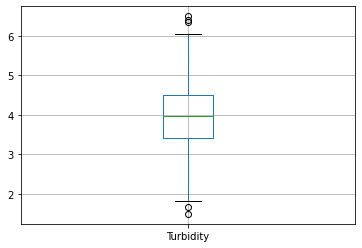

In [15]:
print("Boxplot kolom 'Turbidity' bagian awal")
turbidity_awal.boxplot(["Turbidity"])

Boxplot kolom 'Turbidity' bagian awal


<AxesSubplot:>

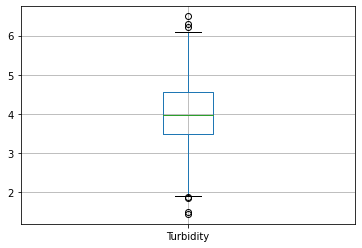

In [16]:
print("Boxplot kolom 'Turbidity' bagian awal")
turbidity_akhir.boxplot(["Turbidity"])

#### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

In [17]:
n1 = water_potability['Sulfate'].count() // 2
n2 = water_potability['Sulfate'].count() - n1

sulfate_awal = water_potability.iloc[:n1,:]
sulfate_akhir = water_potability.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("#### 1. Hipotesis nol"))
display(Markdown("$\nH_0 : \\sigma^2_1 - \\sigma^2_2 = 0$"))

display(Markdown("#### 2. Hipotesis alternatif"))
display(Markdown("$\nH_1 : \\sigma^2_1 - \\sigma^2_2 \\neq 0$ (Tipe tes: *two-tailed test)*"))

display(Markdown("#### 3. Tingkat signifikan $\\alpha = 0.05$"))

display(Markdown("#### 4. Uji statistik dan daerah kritis"))
display(Markdown("Uji test kali ini menggunakan uji **Distribusi F**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:"))
v1, v2 = (n1 - 1), (n2 - 1)
display(Markdown("\n$v_1 = n_1 - 1 = "+str(v1)+", v_1 = n_1 - 1 = "+str(v2)+"$"))

display(Markdown("Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $f < 0.90152732$ atau $f > 1.10922872$"))

display(Markdown("#### 5. Perhitungan nilai uji statistik dan p-value"))
s12 = sulfate_awal['Sulfate'].var()
s22 = sulfate_akhir['Sulfate'].var()

display(Markdown("$s^2_1 = "+ str(s12) +  "$"))
display(Markdown("$s^2_2 = "+ str(s22) +  "$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nf = \\frac{s^2_1}{s^2_2}$"))

f = s12 / s22

display(Markdown("didapat $f =" + str(f) + "$"))
display(Markdown("#### 6. Kesimpulan"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena nilai $t$ yang didapat **tidak terletak** di daerah kritis, melainkan terletak di $0.90152732 \\le f \\le 1.10922872 $\n"))

Misal bagian awal = 1 dan bagian akhir = 2

#### 1. Hipotesis nol

$
H_0 : \sigma^2_1 - \sigma^2_2 = 0$

#### 2. Hipotesis alternatif

$
H_1 : \sigma^2_1 - \sigma^2_2 \neq 0$ (Tipe tes: *two-tailed test)*

#### 3. Tingkat signifikan $\alpha = 0.05$

#### 4. Uji statistik dan daerah kritis

Uji test kali ini menggunakan uji **Distribusi F**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:


$v_1 = n_1 - 1 = 1004, v_1 = n_1 - 1 = 1004$

Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $f < 0.90152732$ atau $f > 1.10922872$

#### 5. Perhitungan nilai uji statistik dan p-value

$s^2_1 = 1708.3966020772502$

$s^2_2 = 1682.7330644425087$

$n_1 = 1005,n_2 = 1005$

$
f = \frac{s^2_1}{s^2_2}$

didapat $f =1.0152511043950063$

#### 6. Kesimpulan

**$H_0$ TIDAK DITOLAK** karena nilai $t$ yang didapat **tidak terletak** di daerah kritis, melainkan terletak di $0.90152732 \le f \le 1.10922872 $


Boxplot kolom 'Sulfate' bagian awal


<AxesSubplot:>

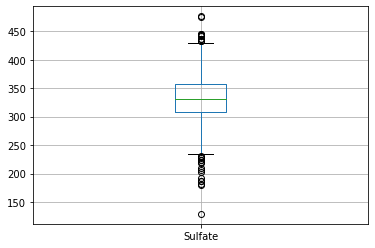

In [18]:
print("Boxplot kolom 'Sulfate' bagian awal")
sulfate_awal.boxplot(["Sulfate"])

Boxplot kolom 'Sulfate' bagian awal


<AxesSubplot:>

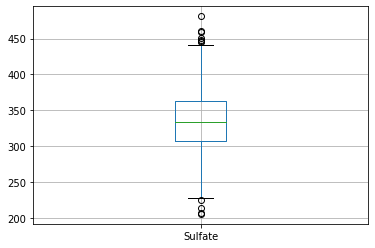

In [19]:
print("Boxplot kolom 'Sulfate' bagian awal")
sulfate_akhir.boxplot(["Sulfate"])

### 6. Test korelasi
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test. 
Nilai koefisien korelasi terletak di pada rentang antara -1 dan 1, dengan rincian sebagai berikut:
- $-1$ menunjukkan korelasi $X$ dan $Y$ negatif yang kuat. setiap kali $X$ meningkat, $Y$ berkurang.
- $0$ berarti tidak ada hubungan antara $X$ dan $Y$.
- $1$ menunjukkan korelasi $X$ dan $Y$ positif yang kuat. setiap kali $X$ meningkat, $Y$ meningkat.

Skala korelasi sebagai acuan:
- 0 - 0,01: **Tidak ada** korelasi antara dua variabel
- 0,01 – 0,25: Korelasi sangat **lemah**
- 0,25 – 0,5: Korelasi **cukup**
- 0,5 – 0,75: Korelasi  **kuat**
- 0,75 – 0,99: Korelasi  **sangat kuat**
- 1: Korelasi **sempurna**

In [20]:
# fungsi untuk menuliskan hasil korelasi
def corr_result(rho, x, y):
    out = "Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom "+ x +" dan "+ y
    if (rho > -0.01 and rho < 0.01): out += " **tidak** berkorelasi"
    else:
        if (rho > 0): out += " berkorelasi **positif** "
        else: out += " berkorelasi **negatif** "

        out += " dan memiliki tingkat korelasi "
        if (rho >= 0.01 and rho <= 0.25) or (rho <= -0.01 and rho >= -0.25): out += "**sangat lemah**"
        elif (rho > 0.25 and rho <= 0.5) or (rho < -0.25 and rho >= -0.5): out += "**cukup**"
        elif (rho > 0.5 and rho <= 0.75) or (rho < -0.5 and rho >= -0.75): out += "**kuat**"
        elif (rho > 0.75 and rho < 1) or (rho < -0.75 and rho > -1): out += "**sangat kuat**"
        else: out += "**sempurna**"
    display(Markdown(out))

#### pH

Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)

$\rho_{pH,Potability} = 0.01547509440843348$

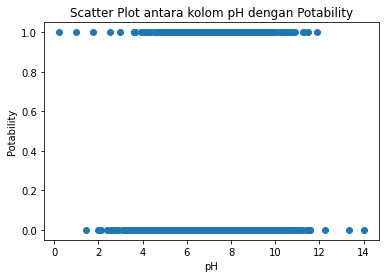

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom pH dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [21]:
display(Markdown("#### pH"))
display(Markdown("Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)"))
rho = water_potability['pH'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{pH,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom pH dengan Potability")
plt.scatter(x=water_potability['pH'],y=water_potability['Potability'])
plt.xlabel("pH")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "pH", "Potability")

#### Hardness

Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)

$\rho_{Hardness,Potability} = -0.0014631528959479344$

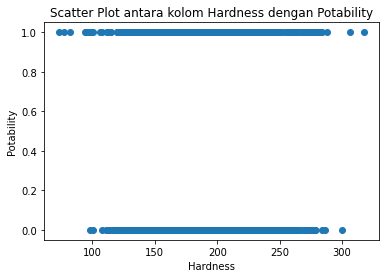

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Hardness dan Potability **tidak** berkorelasi

In [22]:
display(Markdown("#### Hardness"))
display(Markdown("Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)"))
rho = water_potability['Hardness'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Hardness,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Hardness dengan Potability")
plt.scatter(x=water_potability['Hardness'],y=water_potability['Potability'])
plt.xlabel("Hardness")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Hardness", "Potability")

#### Solids

Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)

$\rho_{Solids,Potability} = 0.03897657818173466$

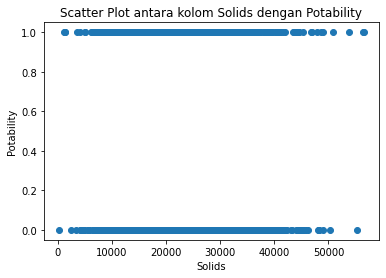

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Solids dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [23]:
display(Markdown("#### Solids"))
display(Markdown("Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)"))
rho = water_potability['Solids'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Solids,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Solids dengan Potability")
plt.scatter(x=water_potability['Solids'],y=water_potability['Potability'])
plt.xlabel("Solids")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Solids", "Potability")

#### Chloramines

Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)

$\rho_{Chloramines,Potability} = 0.02077892184052409$

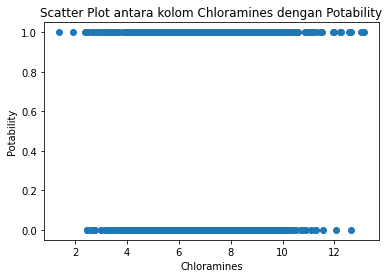

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Chloramines dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [24]:
display(Markdown("#### Chloramines"))
display(Markdown("Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)"))
rho = water_potability['Chloramines'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Chloramines,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Chloramines dengan Potability")
plt.scatter(x=water_potability['Chloramines'],y=water_potability['Potability'])
plt.xlabel("Chloramines")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Chloramines", "Potability")

#### Sulfate

Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)

$\rho_{Sulfate,Potability} = -0.015703164419273778$

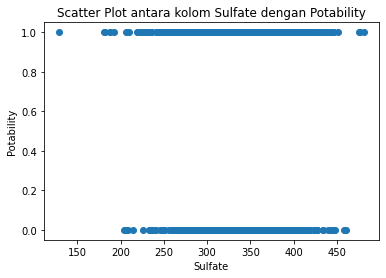

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Sulfate dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [25]:
display(Markdown("#### Sulfate"))
display(Markdown("Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)"))
rho = water_potability['Sulfate'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Sulfate,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Sulfate dengan Potability")
plt.scatter(x=water_potability['Sulfate'],y=water_potability['Potability'])
plt.xlabel("Sulfate")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Sulfate", "Potability")

#### Conductivity

Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)

$\rho_{Conductivity,Potability} = -0.016257120111377067$

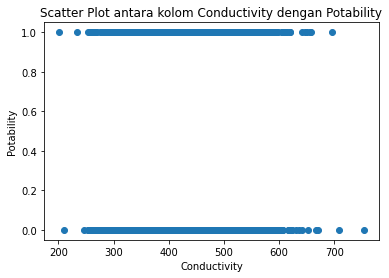

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Conductivity dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [26]:
display(Markdown("#### Conductivity"))
display(Markdown("Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)"))
rho = water_potability['Conductivity'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Conductivity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Conductivity dengan Potability")
plt.scatter(x=water_potability['Conductivity'],y=water_potability['Potability'])
plt.xlabel("Conductivity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Conductivity", "Potability")

#### OrganicCarbon

Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)

$\rho_{OrganicCarbon,Potability} = -0.015488461910747259$

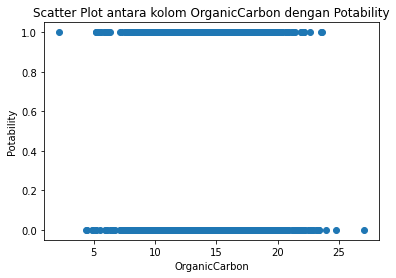

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom OrganicCarbon dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [27]:
display(Markdown("#### OrganicCarbon"))
display(Markdown("Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)"))
rho = water_potability['OrganicCarbon'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{OrganicCarbon,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom OrganicCarbon dengan Potability")
plt.scatter(x=water_potability['OrganicCarbon'],y=water_potability['Potability'])
plt.xlabel("OrganicCarbon")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "OrganicCarbon", "Potability")

#### Trihalomethanes

Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)

$\rho_{Trihalomethanes,Potability} = 0.009236711064712997$

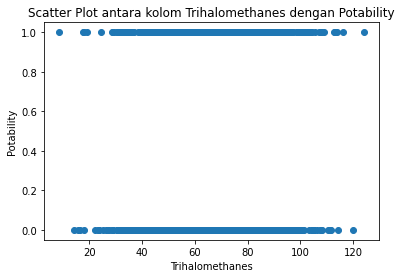

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Trihalomethanes dan Potability **tidak** berkorelasi

In [28]:
display(Markdown("#### Trihalomethanes"))
display(Markdown("Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)"))
rho = water_potability['Trihalomethanes'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Trihalomethanes,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Trihalomethanes dengan Potability")
plt.scatter(x=water_potability['Trihalomethanes'],y=water_potability['Potability'])
plt.xlabel("Trihalomethanes")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Trihalomethanes", "Potability")

#### Turbidity

Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)

$\rho_{Turbidity,Potability} = 0.022331042640622665$

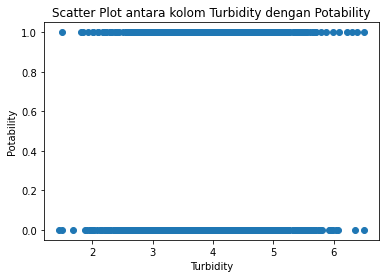

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Turbidity dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [29]:
display(Markdown("#### Turbidity"))
display(Markdown("Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)"))
rho = water_potability['Turbidity'].corr(water_potability['Potability'])
display(Markdown("$\\rho_{Turbidity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Turbidity dengan Potability")
plt.scatter(x=water_potability['Turbidity'],y=water_potability['Potability'])
plt.xlabel("Turbidity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Turbidity", "Potability")